In [3]:
import os
import json
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def visualize_detections_per_object(wide_path, is_20, save=False, out_dir="output_detections"):
    image_path = os.path.join(wide_path, "image.png")
    if is_20:
        json_path = os.path.join(wide_path, "detection_confidence_20.json")
    else:
        json_path = os.path.join(wide_path, "detection.json")

    # 读取图像
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ 无法读取图像: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 读取 JSON
    try:
        with open(json_path, "r") as f:
            data = json.load(f)
    except Exception as e:
        print(f"❌ 无法读取 JSON: {json_path}")
        print(str(e))
        return

    if save and not os.path.exists(out_dir):
        os.makedirs(out_dir)

    for i, obj in enumerate(data):
        box = obj.get("box_2d_rend", None)
        label = obj.get("class_name", "object")
        if not box or len(box) != 4:
            continue
        x1, y1, x2, y2 = box

        fig, ax = plt.subplots(figsize=(8, 6))
        ax.imshow(image)
        width = x2 - x1
        height = y2 - y1
        rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='green', facecolor='none')
        ax.add_patch(rect)
        ax.set_title(f"{label}（对象 {i + 1}）", fontsize=14)
        ax.text(x1, y1 - 5, label, color='green', fontsize=10)
        plt.axis("off")
        
        if save:
            save_path = os.path.join(out_dir, f"detection_{i+1}.png")
            plt.savefig(save_path, bbox_inches='tight')
            plt.close()
        else:
            plt.show()

/home/tanhuajie/miniconda3/envs/osd_v3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tanhuajie/miniconda3/envs/osd_v3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tanhuajie/miniconda3/envs/osd_v3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35937 (\N{CJK UNIFIED IDEOGRAPH-8C61}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tanhuajie/miniconda3/envs/osd_v3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


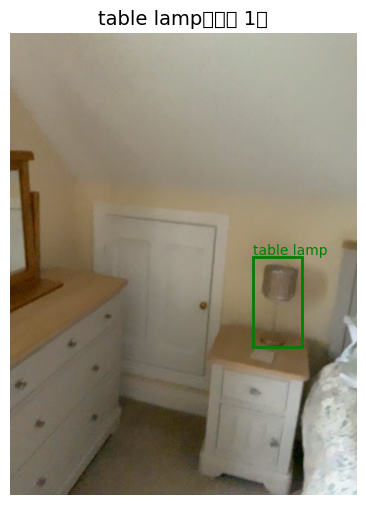

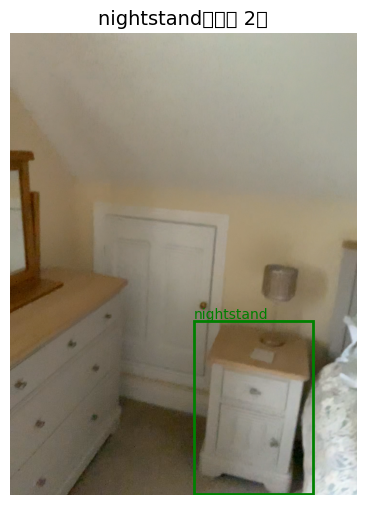

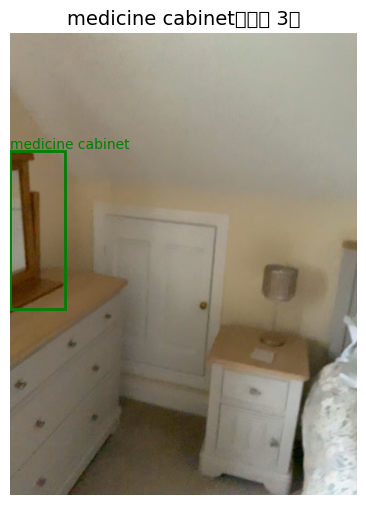

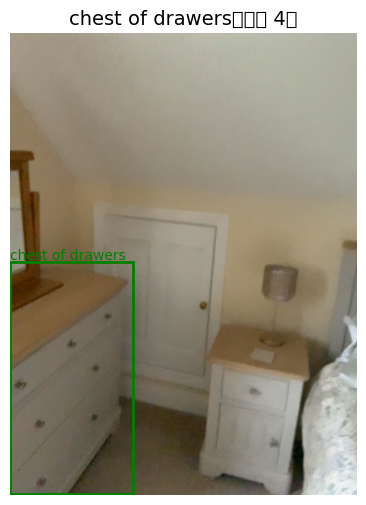

In [8]:
# 指定 wide 文件夹路径（请替换为你的实际路径）
wide_path = "/home_sfs/zhouenshen/dataset/3D/cubifyanything/filter_step_20/42445129/5074433476291/wide"

# 可视化匹配后
visualize_detections_per_object(wide_path, '')

In [7]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

def visualize_dense_captions_per_object(wide_dir):
    """
    wide_dir: 指向 wide 文件夹的路径，例如：
        "/home_sfs/.../scene_id/frame_id/wide"
    """
    image_path = os.path.join(wide_dir, "image_resized.png")
    caption_json_path = os.path.join(wide_dir, "detection_GroundingDino_bbox_RAM_label_qwen_caption_confidence25.json")

    # 加载图像
    image = Image.open(image_path).convert("RGB")

    # 加载 JSON
    with open(caption_json_path, "r") as f:
        data = json.load(f)

    objects = data.get("objects", [])
    print(f"图像 caption：{data.get('image_caption', '')}")
    print(f"共检测到 {len(objects)} 个物体。")

    for idx, obj in enumerate(objects):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.imshow(image)
        x1, y1, x2, y2 = obj["bbox_resized"]
        width = x2 - x1
        height = y2 - y1
        rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        caption = obj.get("dense_caption", "No caption").strip()
        ax.text(x1, y2 + 15, caption, fontsize=12, color='blue', backgroundcolor='white')

        ax.set_title(f"物体 {idx+1}: {obj.get('class_name', 'object')}", fontsize=14)
        plt.axis("off")
        plt.show()
        print(obj.get("spatial_caption"))

图像 caption：The image depicts a cozy and organized children's study area within a room. The space features a small white wooden table accompanied by two matching chairs, all with simple, clean lines and a minimalist design. The table is cluttered with various items, including a notebook, a small wooden box, a red glue stick, and a few other stationery items like pens and pencils. A metal container holds an assortment of colorful pencils and markers.

Above the table, there are three small, pastel-colored bins neatly arranged on a shelf, each containing different stationery supplies. To the left of the table, a decorative white shelf holds a few items
共检测到 11 个物体。


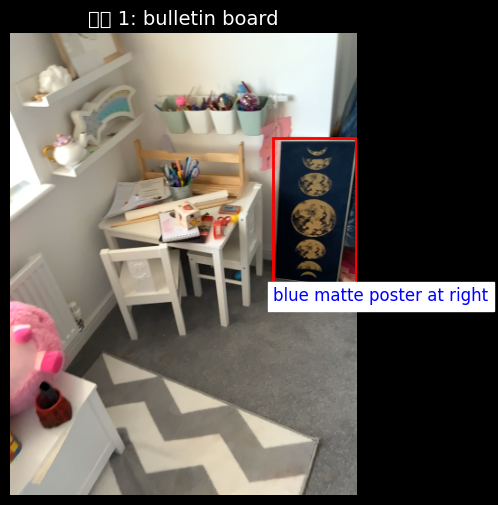

['blue matte poster at right']


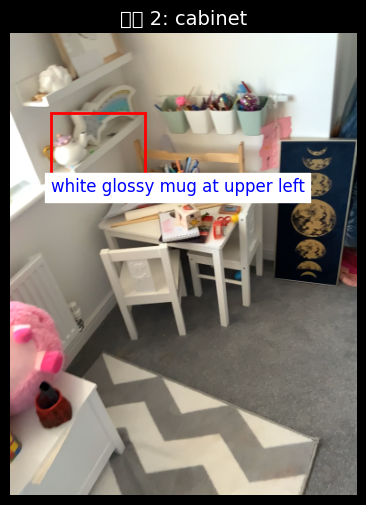

['white glossy mug at upper left']


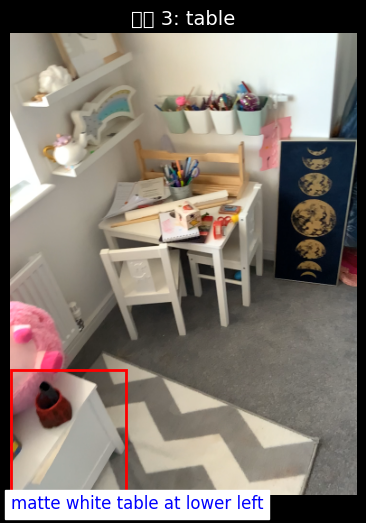

['matte white table at lower left, which is counted as the first table, starting from the front', 'matte white table at lower left, the 2th table from the back', 'matte white table at lower left, the 2th table in the top-to-bottom sequence', 'matte white table at lower left, which is the 1th table from bottom to top']


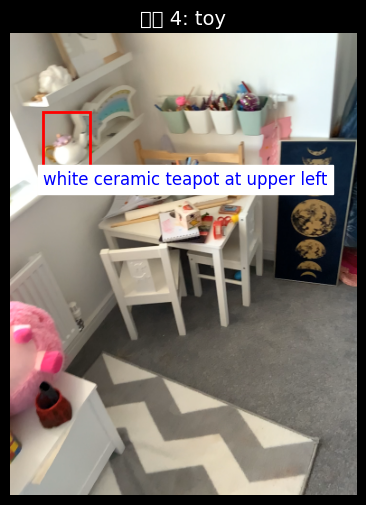

['white ceramic teapot at upper left, marked as the 2th toy in a top-to-bottom arrangement', 'white ceramic teapot at upper left, which ranks as the first toy in bottom-to-top order']


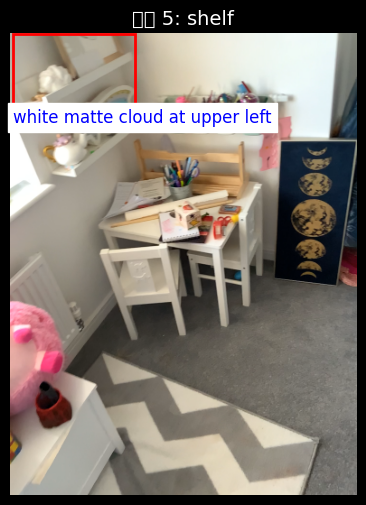

['white matte cloud at upper left']


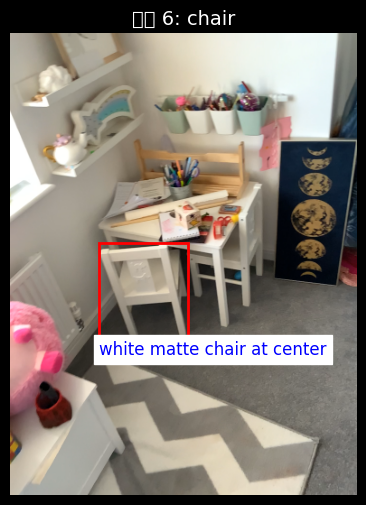

['white matte chair at center, which is the 2th chair in top-to-bottom order', 'white matte chair at center, which is counted as the first chair, starting from the bottom']


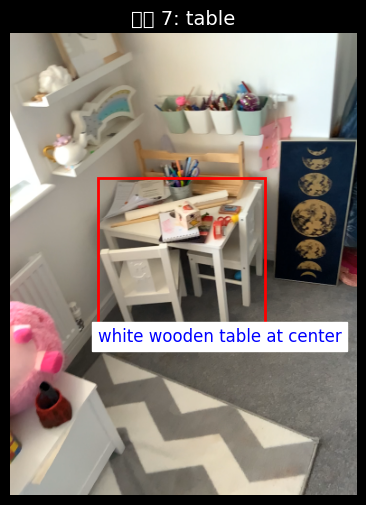

['white wooden table at center, arranged as the second table when viewed from the front', 'white wooden table at center, which appears as the 1th table when viewed from the back', 'white wooden table at center, which appears as the 1th table when viewed from the top', 'white wooden table at center, placed as the second table when sorted from bottom to top']


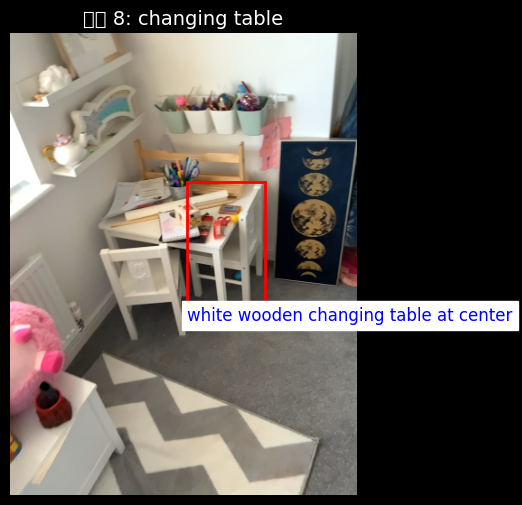

['white wooden changing table at center']


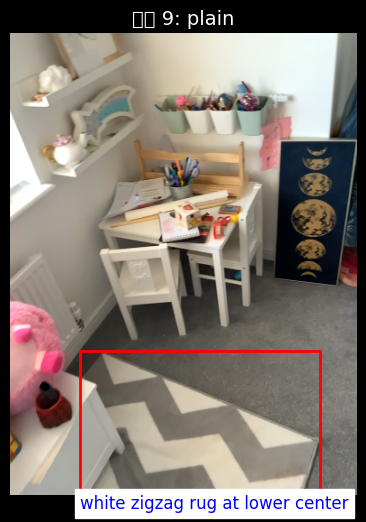

['white zigzag rug at lower center']


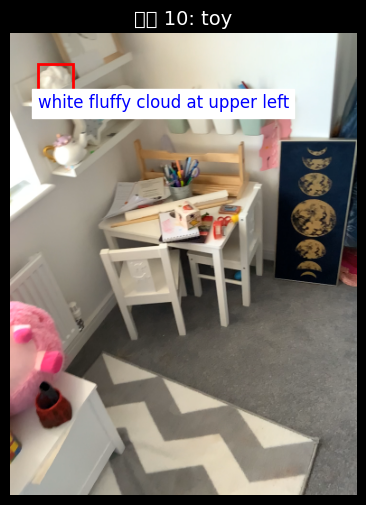

['white fluffy cloud at upper left, positioned as the 1th toy in top-to-bottom order', 'white fluffy cloud at upper left, marked as the second toy in a bottom-to-top arrangement']


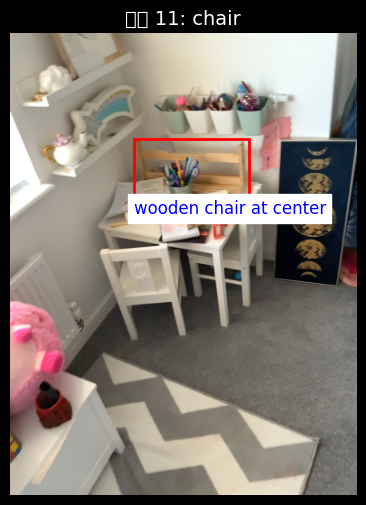

['wooden chair at center, placed as the first chair when sorted from top to bottom', 'wooden chair at center, acting as the second chair starting from the bottom']


In [ ]:
wide_path = "/home_sfs/zhouenshen/dataset/3D/cubifyanything/filter_step_20/49739960/18570773165291/wide"
visualize_dense_captions_per_object(wide_path)